## Objective: 

Identify all the different types of engineering college and categorize them 

## Top Questions:
1. How many differnt types of engg colleges are present 
2. How each of there types of engg colleges are different from each other



In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.spatial.distance import cdist

In [28]:
dataset = pd.read_csv('/Users/rishavdas/Downloads/Engineering+Colleges+Case+Study.csv')

In [3]:
dataset.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Infrastructure
0,1,A,5,2,5,3
1,2,B,4,2,5,3
2,3,C,4,5,5,5
3,4,D,5,4,5,4
4,5,E,2,5,2,5


In [4]:
dataset.shape

(26, 6)

In [5]:
df = dataset.copy()

In [6]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Infrastructure
0,1,A,5,2,5,3
1,2,B,4,2,5,3
2,3,C,4,5,5,5
3,4,D,5,4,5,4
4,5,E,2,5,2,5


In [7]:
df.drop('SR_NO', axis=1, inplace=True)

In [8]:
df.head()

,Engg_College,Teaching,Fees,Placements,Infrastructure
0,A,5,2,5,3
1,B,4,2,5,3
2,C,4,5,5,5
3,D,5,4,5,4
4,E,2,5,2,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Engg_College    26 non-null     object
 1   Teaching        26 non-null     int64 
 2   Fees            26 non-null     int64 
 3   Placements      26 non-null     int64 
 4   Infrastructure  26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [10]:
df.describe()

,Teaching,Fees,Placements,Infrastructure
count,26.000000,26.000000,26.000000,26.000000
mean,2.807692,3.576923,2.884615,3.384615
std,1.132051,1.331858,1.531716,1.298520
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.250000,1.250000,3.000000
50%,3.000000,4.000000,3.000000,3.000000
75%,3.000000,5.000000,4.000000,4.750000
max,5.000000,5.000000,5.000000,5.000000


In [14]:
def discrete_univariate_analysis(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="flare",
        order=data[feature].value_counts().index[:n].sort_values(ascending=False))
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points")
    plt.show()

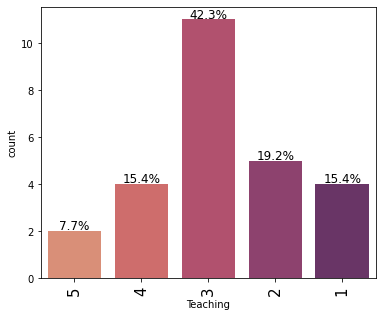

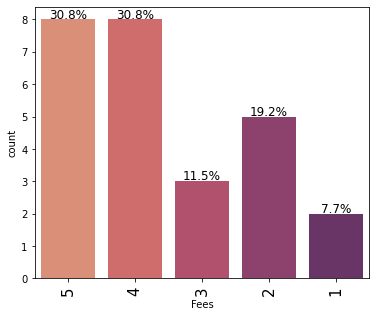

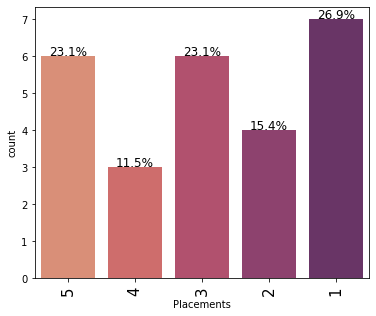

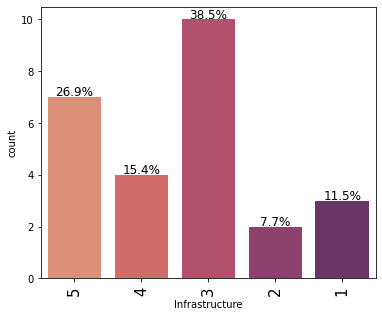

In [16]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for item in num_cols:
    discrete_univariate_analysis(df,item, perc = True)

## Observation 
1. More than 60% of the colleges are providing avg placement with Rate of 3 
2. More than 80% of the colleges are providing avg Infrastructure with Rate of 3
3. More than 65% colleges are having high fees with rating of 4- 5 


## Bivariate Analysis

**correlation Analysis**

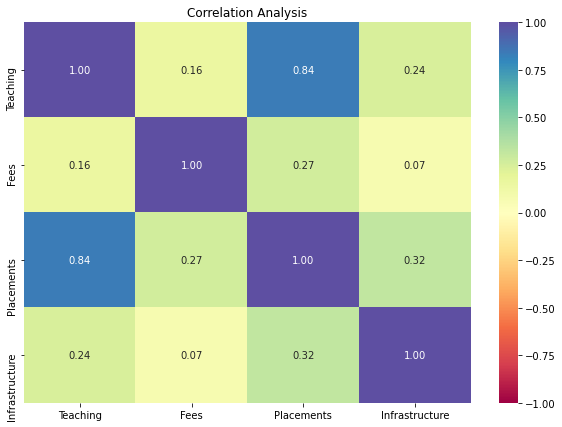

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation Analysis")
plt.show()


## Observation 

1. Rating and Teaching is highly correlated 
2. High quality of Teaching leads to high qulaity of **Placement** 

In [ ]:
salary == 20,000 euros to 70,000 euro === 0 to 1

age == 18 yrs to 60 yrs ===== 0 to 1 


In [22]:
df.head()

,Engg_College,Teaching,Fees,Placements,Infrastructure
0,A,5,2,5,3
1,B,4,2,5,3
2,C,4,5,5,5
3,D,5,4,5,4
4,E,2,5,2,5


In [24]:
df.drop(columns=['Engg_College'], inplace=True)

In [25]:
df.columns

Index(['Teaching', 'Fees', 'Placements', 'Infrastructure'], dtype='object')

number of clusters 1 	AverageDistortion: 2.445161236901436
number of clusters 2 	AverageDistortion: 1.8386954425352884
number of clusters 3 	AverageDistortion: 1.5663251587239047
number of clusters 4 	AverageDistortion: 1.319866756300917
number of clusters 5 	AverageDistortion: 1.1752753661439113
number of clusters 6 	AverageDistortion: 1.0295335832815407
number of clusters 7 	AverageDistortion: 0.8898446858367483
number of clusters 8 	AverageDistortion: 0.7621339337671245
number of clusters 9 	AverageDistortion: 0.6847046905796431


Text(0.5, 1.0, 'selecting K with Elbow Method')

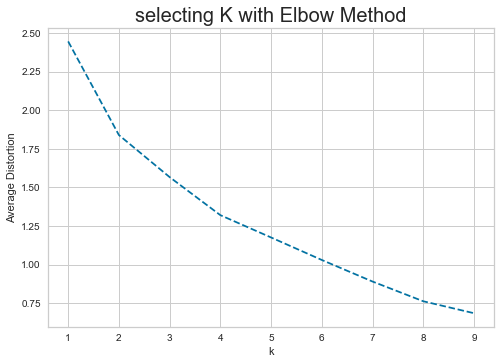

In [34]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(df)
    prediction  = model.predict(df)
    distortion =  (
        sum(
            np.min(cdist(df, model.cluster_centers_, 'euclidean'),
                   axis=1)) / df.shape[0])
    meanDistortions.append(distortion)
    print("number of clusters", k, "\tAverageDistortion:", distortion)
plt.plot(clusters, meanDistortions, 'bx--')
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("selecting K with Elbow Method", fontsize=20)

## Silhouette Score 

how similar two clusters are.
1. Measuring the cohesion between two clusters 
2. Silhouette score will range between -1 to 1
     1. Silhouette score of +1 indicates that sample far away from neighbour cluster s
     2. Silhouette score of -1 indicates that those samples might be assigned to wrong clusters 

For nm_clusters = 2, Silhouette_Score is 0.38121701144257797
For nm_clusters = 3, Silhouette_Score is 0.4288415910208104
For nm_clusters = 4, Silhouette_Score is 0.36154656907517135
For nm_clusters = 5, Silhouette_Score is 0.36463929699597486
For nm_clusters = 6, Silhouette_Score is 0.38242794677049674
For nm_clusters = 7, Silhouette_Score is 0.4213389680738873
For nm_clusters = 8, Silhouette_Score is 0.45545926155854705
For nm_clusters = 9, Silhouette_Score is 0.4312323711864557


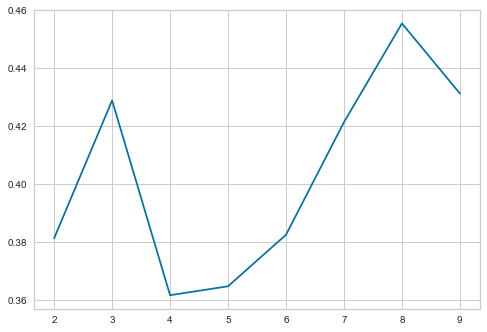

In [35]:
sil_score = list()
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    cluster_vals = KMeans(n_clusters = n_clusters)
    preds = cluster_vals.fit_predict((df))
    score  =  silhouette_score(df, preds)
    sil_score.append(score)
    print("For nm_clusters = {}, Silhouette_Score is {}".format(n_clusters, score))
plt.plot(cluster_list, sil_score)

## Observation :

At silhouette k== 8, we get to see high values of difference , so lets investigate

## Silhouette Visualizer 

**How to read silhouette visualizer**

1. Width of each cluster refers to the size of each clusters
2. Horizontal line refers to the coefficient values of silhouette score
3. Dotted red is avg silhouette score

**Rules to be followed** 
1. No Negative coefficients to be used 
2. All the clusters should cross avergae silhouette score 
3. All the clusters should not have same width 
4. All the clusters should have different silhouette score 

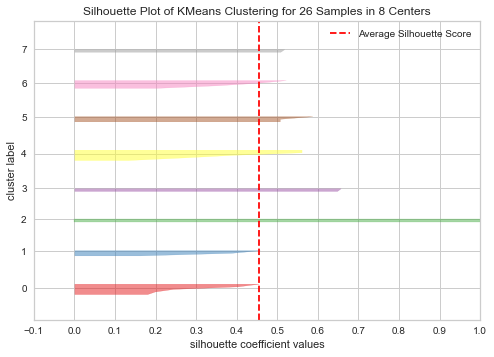

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(df)
visualizer.show()

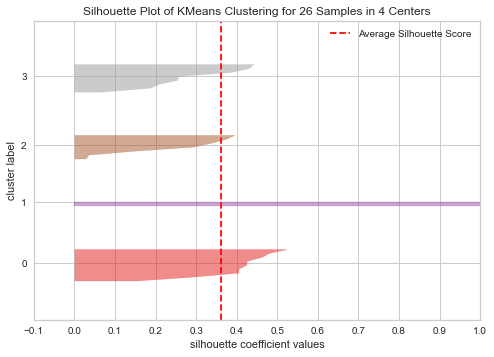

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df)
visualizer.show()

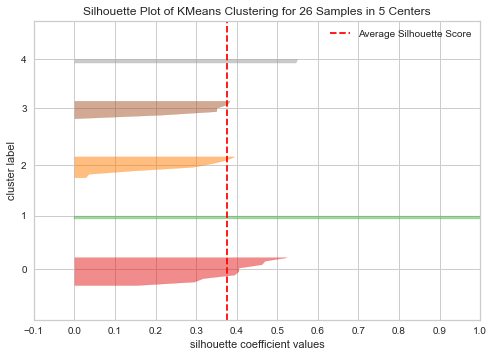

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df)
visualizer.show()

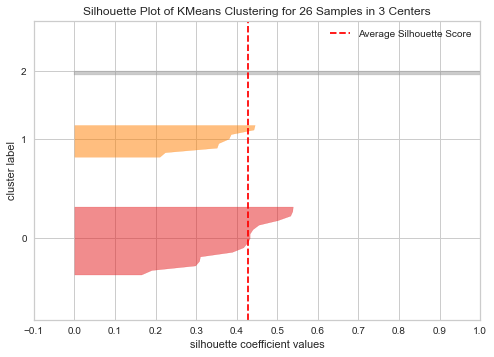

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df)
visualizer.show()

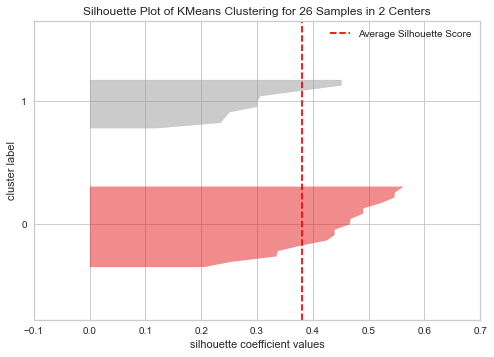

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(df)
visualizer.show()

In [41]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

In [42]:
df['K Means Segment'] = kmeans.labels_


In [43]:
df.head()

,Teaching,Fees,Placements,Infrastructure,K Means Segment
0,5,2,5,3,1
1,4,2,5,3,1
2,4,5,5,5,1
3,5,4,5,4,1
4,2,5,2,5,1


In [45]:
cluster_info = df.groupby(['K Means Segment']).mean()


In [46]:
cluster_info.head()

,Teaching,Fees,Placements,Infrastructure
K Means Segment,,,,
0,1.900,2.700,1.300,2.600
1,3.375,4.125,3.875,3.875


In [47]:
cluster_info["count in each segment"] = (df.groupby("K Means Segment")['Fees'].count().values)

In [48]:
cluster_info.head()

,Teaching,Fees,Placements,Infrastructure,count in each segment
K Means Segment,,,,,
0,1.900,2.700,1.300,2.600,10
1,3.375,4.125,3.875,3.875,16


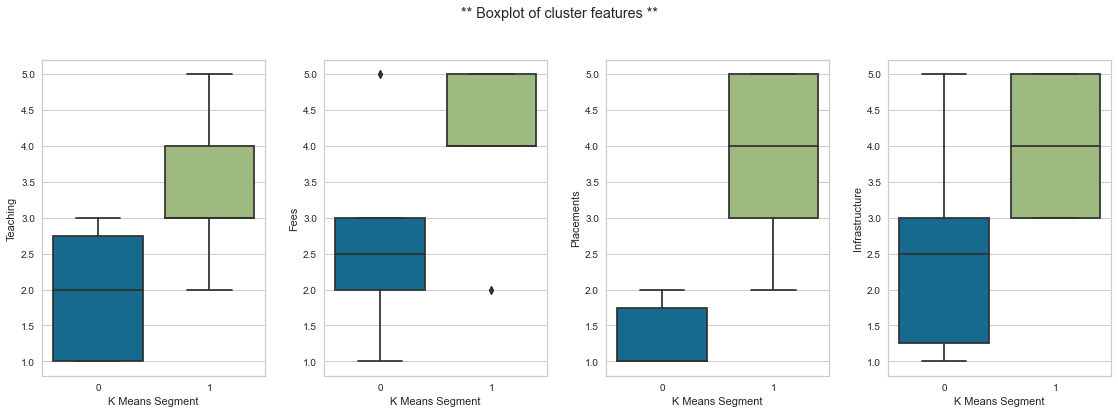

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(16,6))
fig.suptitle("** Boxplot of cluster features **")
counter=0 
for i in range(4):
    sns.boxplot(ax=axes[i], y = df[num_cols[counter]], x = df["K Means Segment"])
    counter = counter+1
fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K Means Segment'>

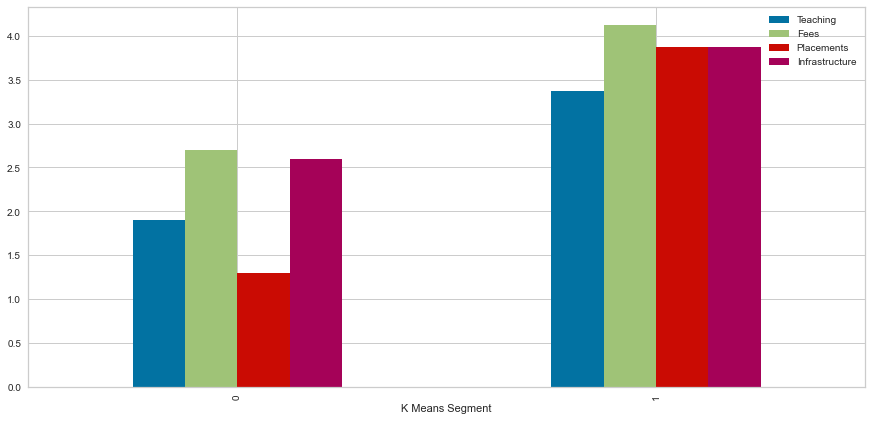

In [54]:
df.groupby("K Means Segment").mean().plot.bar(figsize=(15,7))

## Conclusion:

**cluster-1** : Tier 1 colleges with high quality fo Teaching and higher fees and very good placement and infrastructure 

**cluster-0** : Tier2 and Tier 3 colleges with poor teaching and poor placement as well as infra. It also has lower fees